Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dataset

In [15]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing Thompson Sampling

In [16]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        if random_beta>max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

Visualizing the result

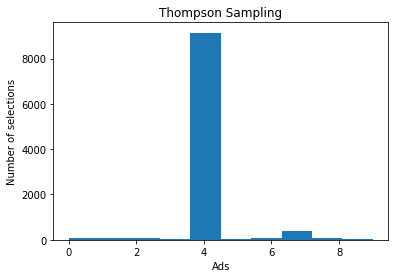

In [17]:
plt.hist(ads_selected)
plt.title("Thompson Sampling")
plt.xlabel("Ads")
plt.ylabel("Number of selections")
plt.show()